# Analysis of immunohistochemistry signal intensity in tumor samples

__Background:__

Tumor cells are surrounded by normal cells like immune cells,blood vessels, cytokines, growth regulators etc. which constitute the tumor microenvironment(TME). It is proposed that tumor microenvironment plays a critical role in tumor development. We want to evaluate how the inflammatory pathways present in the TME affect tumor development. The TME was modeled by genetically inducing formation of tumor clones surrounded by normal cells in the drosophila wing imaginal discs. To evaulate inflammation components, immunohisochemistry was done followedby confocal imaging. Using measurement log function of Photoshop, signal intensity was measured in the tumor clones and the normal cells. 

__Data:__

The data is generated as a CSV file which contains various information :
1. Label : # of the measurement 
2. Data and time of the analysis perfromed
3. Document : File name which also indicates the sample number, magnification and genotype information
4. Source: Selection indicates user defined area
5. Scale, scale units, scale factor , count, area , perimeter, circularity, height, width remain same for all the area
6. Gray value (min, max,mean,median) show the variation in the intensity of the signal in the user defined area
7. Integrated density is calculated by the program based on the signal intensity in the area 

__Analysis:__

The mean of signal intensity of the tumor and normal cell from 5 different sample is obtained and compared to analyse any significant change in inflammatory component during tumor development. 

__The goal of this project is to write a code which will do following steps:__

1. Read the excel file 
2. Create a dataframe that contains the document and integrated density data
3. Check for duplication of data
4. Sort the data for normal and tumor samples
5. Calculate the mean signal intesity for each sample in both categories 
6. Visualize the signal intensities using bar graph
7. Perform descriptive statistics 
8. Perform inferential statistics
9. Result





In [1]:
# Import required databases
import numpy as np
import pandas as pd

In [2]:
# Open, read and save the data as a dataframe variable
df = pd.read_csv("YS MMP1.csv") 
df.head()

,Label,Date and Time,Document,Source,Scale,Scale Units,Scale Factor,Count,Area,Perimeter,Circularity,Height,Width,Gray Value (Minimum),Gray Value (Maximum),Gray Value (Mean),Gray Value (Median),Integrated Density,Histogram
0,Measurement 1,2018-12-09T12:30:26-05:00,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",Selection,1 pixel(s) = 1.0000 pixels,pixels,1,1,1976,166.024387,0.900851,50,50,0,61,11.092105,10,21918,Histogram-1.csv
1,Measurement 2,2018-12-09T12:30:44-05:00,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",Selection,1 pixel(s) = 1.0000 pixels,pixels,1,1,1976,166.024387,0.900851,50,50,0,25,5.225202,5,10325,Histogram-2.csv
2,Measurement 3,2018-12-09T12:31-05:00,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",Selection,1 pixel(s) = 1.0000 pixels,pixels,1,1,1976,166.024387,0.900851,50,50,0,36,10.562753,10,20872,Histogram-3.csv
3,Measurement 4,2018-12-09T12:31:14-05:00,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",Selection,1 pixel(s) = 1.0000 pixels,pixels,1,1,1976,166.024387,0.900851,50,50,0,28,5.284919,5,10443,Histogram-4.csv
4,Measurement 5,2018-12-09T12:31:33-05:00,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",Selection,1 pixel(s) = 1.0000 pixels,pixels,1,1,1976,166.024387,0.900851,50,50,0,54,10.634615,10,21014,Histogram-5.csv


In [3]:
#Create a dataframe that contains the name of the document and integrated density data
df1=df[["Document","Integrated Density"]]
df1.head(5)

,Document,Integrated Density
0,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",21918
1,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",10325
2,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",20872
3,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",10443
4,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",21014


### Check for duplication of data

In [4]:
# Evaluate for any dupliacate data and drop it.
df1.drop_duplicates(subset=['Document','Integrated Density'], keep ='first') 
df1.head(5)

,Document,Integrated Density
0,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",21918
1,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",10325
2,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",20872
3,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",10443
4,"W1 40X Ay-GFP, UAS Yki3SA, UAS ScribRNAi MMP1,...",21014


In [5]:
#Extract the integrated intensity as a list
Signal_intensity = df1["Integrated Density"].tolist()
tumor=[]
normal =[]
# sort the MMP1 signal for tumor or normal sample
for n in Signal_intensity:
    if Signal_intensity.index(n)%2==0:
        tumor.append(n)
    else:
        normal.append(n)

### Calculate the mean signal intesity for each sample in both categories
A function is created which goes through the list of integrated density and puts them into different lists according to sample type . later mean vaue of signal intensity is compiled into a dictionary and finally converted into a dataframe. This will be helpful to go over multiple data sets andsort them , calculate the mean and create the new data set which is ready for analysis. 

In [6]:
# This function sorts the different signal intensities according to the source sample(wing discs)
# calculates there mean, puts them in a dictionary and returns a dataframe
def Sample(sample_list=[]):
    W1=[] 
    W2=[]
    W3=[]
    W4=[]
    W5=[]
    for n in sample_list:
        if sample_list.index(n)<3:
            W1.append(n)
        elif sample_list.index(n)>2 and sample_list.index(n)<6:
            W2.append(n)
        elif sample_list.index(n)>5 and sample_list.index(n)<9:
            W3.append(n)
        elif sample_list.index(n)>8 and sample_list.index(n)<12:
            W4.append(n)
        else:
            W5.append(n)
    sample_dict = {"W1":np.mean(W1),"W2":np.mean(W2), "W3":np.mean(W3),"W4":np.mean(W4),"W5":np.mean(W5) }
    df2 = pd.DataFrame.from_dict(sample_dict,orient='index',columns=['Mean signal intensity']) 
    return(df2)

tumor_sample = Sample(tumor)
normal_sample = Sample(normal)
print('Normal clone data: \n',normal_sample)
print('Tumor clone data\n',tumor_sample)


Normal clone data: 
     Mean signal intensity
W1           10176.666667
W2            5627.666667
W3           19044.000000
W4            9115.333333
W5            3672.000000
Tumor clone data
     Mean signal intensity
W1           21268.000000
W2           30318.666667
W3           40447.333333
W4           32175.666667
W5           33100.000000


### Visualize the signal intensities using bar graph
Create a function that takes two dataframes and plots a bar graph showing the comparision of the two data sets. It is helpful if multiple data sets need to be compared.

In [7]:
#The comparedplot function accepts two data and creates a bar graph with the two datas plotted together
import matplotlib.pyplot as plt
def comparedplot(data1,data2):
    names= list(data1.index.values)
    fig= plt.subplots()
    index1 = np.arange(len(data1))
    index2 = np.arange(len(data2))
    bar_width = 0.35
    opacity = 0.8

    fig1 = plt.bar(index1,data1['Mean signal intensity'], bar_width,alpha=opacity,color='b',label='Normal clone')

    fig2 = plt.bar(index2 + bar_width,data2['Mean signal intensity'], bar_width,alpha=opacity,color='g',label='Tumor clone')

    plt.ylabel('Integrated density(A.U.)')
    plt.title('MMP1 expression in Normal and Tumor clones')
    plt.xticks((index1 + bar_width), names)
    plt.legend()
    plt.tight_layout()
       
    return (plt.show())

comparedplot(normal_sample,tumor_sample)


<Figure size 640x480 with 1 Axes>

In [8]:
# Descriptive statistics to calculate the mean and standard deviation of both the categories
normal_stat = normal_sample['Mean signal intensity'].describe()
tumor_stat= tumor_sample['Mean signal intensity'].describe()
print ('Normal clone statistics: \n',normal_stat)
print ('\nTumor clone statistics: \n',tumor_stat)


Normal clone statistics: 
 count        5.000000
mean      9527.133333
std       5929.811350
min       3672.000000
25%       5627.666667
50%       9115.333333
75%      10176.666667
max      19044.000000
Name: Mean signal intensity, dtype: float64

Tumor clone statistics: 
 count        5.000000
mean     31461.933333
std       6876.653007
min      21268.000000
25%      30318.666667
50%      32175.666667
75%      33100.000000
max      40447.333333
Name: Mean signal intensity, dtype: float64


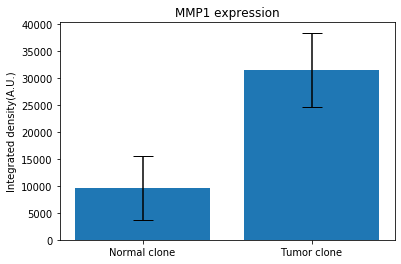

In [9]:
#bar graph of mean MMP1 expression in tumor and normal sample with error bars

plt.bar(['Normal clone', 'Tumor clone'],[normal_stat['mean'], tumor_stat['mean']],yerr=[normal_stat['std'], tumor_stat['std']],capsize = 10)
plt.ylabel('Integrated density(A.U.)')
plt.title('MMP1 expression')
plt.savefig('plot.png', dpi = 300)
plt.show()

In [10]:
# inferential statistics to calculate the p-value and evaluate the significance of the obtained data
from scipy import stats
stats.ttest_rel(tumor_sample['Mean signal intensity'],normal_sample['Mean signal intensity'])

Ttest_relResult(statistic=7.253904279858289, pvalue=0.001917565518142876)

### Interpretation of the Results
A paired sample t-test was used to analyze the MMP1 expression in the surrounding normal cells and tumor clones to test if the there is any significant MMP1 expression during tumor development. The mean MMP1 expression in tumor clones was (31461.93 ±6876.65 A.U.) compared to that in surrounding normal cells (9527.13 ± 5929.81 A.U.); there was a statistically significant increase in MMP1 expression (t(degree of freedom = 4)=7.25, p= 0.0019).